# Numeričko računanje svojstvenih vrijednosti i svojstvenih funkcija Dirichletovog Laplaciana metodom konačnih razlika


Ova bilježnica služi za demonstraciju implementacije numeričkog računanja Dirichletovog Laplaciana metodom konačnih razlika koristeći funkcije za linearnu algebru iz biblioteke *SciPy* paketa.


In [1]:
import copy
import math
import numbers

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp
from mpl_toolkits.mplot3d import Axes3D


In [2]:
%matplotlib inline


Funkcije su implementirane u datoteci *script.py*.


In [3]:
from script import *


Domenu (otvoreni ograničeni skup) prikazujemo logičkom matricom (elementi su joj $ 0 $ i $ 1 $ odnosno `True` i `False`) koja predstavlja diskretizaciju pravokutnika čije zatvorenje sadrži zatvorenje domene. Na mjestu $ \left( i , j \right) $ nalazi se $ 1 $ ako i samo ako ta točka pripada domeni.

U skripti *script* definirane su funkcije `triang` za konstrukciju trokutne domene i `ellips` za konstrukciju eliptične domene. Poziv bez parametara konstruira jednakostranični trokut odnosno krug.


In [4]:
O = triang(num = 100)


Proučimo veličinu dobivene matrice.


In [5]:
O.shape


(100, 87)

Prikažimo matricu `O` na grafu. U skripti *script* definirana je funkcija `show_func` koja olakšava prikaz realnih funkcija na dvodimenzionalnoj domeni reprezentiranih diskretizirajućom matricom. Tip grafa može se čak zadati argumentom.


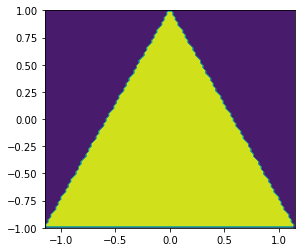

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_aspect('equal')

show_func(O, ax = ax, how = 'contourf')

plt.show()


Izračunajmo $ 10 $ (skaliranih) najmanjih svojstvenih vrijednosti i pripadnih svojstvenih funkcija Dirichletovog Laplaciana na skupu *definiranom* matricom `O` (skup zapravo nije definiran tom matricom, ali ta matrica daje prikaz nekih njegovih točaka, po mogućnosti dovoljno mnogo). Svojstvene vrijednosti i pripadne svojstvene funkcije računamo funkcijom `eigenfunc` definiranom u skripti *script* kojoj, ovisno o resursima i veličini matrice `O`, možemo zadati da se račun izvodi koristeći paket `numpy` ili `scipy.sparse`.


In [7]:
l, u = eigenfunc(O, 10, as_sparse = False)


In [8]:
if not isinstance(l, np.ndarray) or u.ndim == 2:
    l = np.array([l])
    u.shape = (1, u.shape[0], u.shape[1])


Promotrimo izračunate svojstvene vrijednosti.


In [9]:
l.size


10

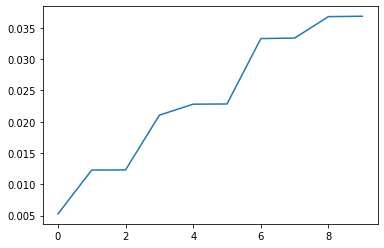

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.plot(l)

plt.show()


Proučimo i prvu svojstvenu funkciju. U tu svrhu ponovo koristimo funkciju `show_func`.


0.005269279007171491


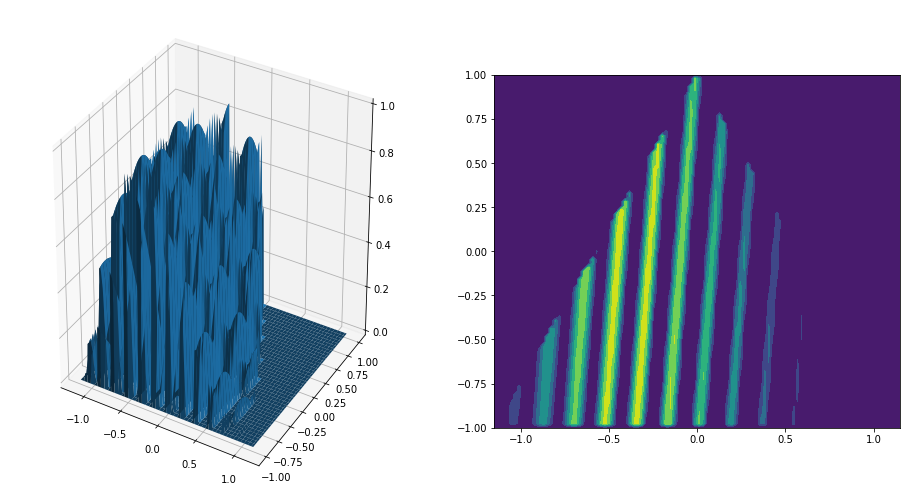

In [11]:
fig = plt.figure(figsize = (16, 9))

ax0 = fig.add_subplot(121, projection = '3d')
ax1 = fig.add_subplot(122)

ax1.set_aspect('equal')

show_func(u[0], ax = ax0, how = 'plot_surface')
show_func(u[0], ax = ax1, how = 'contourf')

print(l[0])

plt.show()
